<a href="https://colab.research.google.com/github/Ishita-Mangal/Small-Image-Classification-Using-Convolutional-Neural-Network-CNN-/blob/main/Small_Image_Classification_Using_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification.
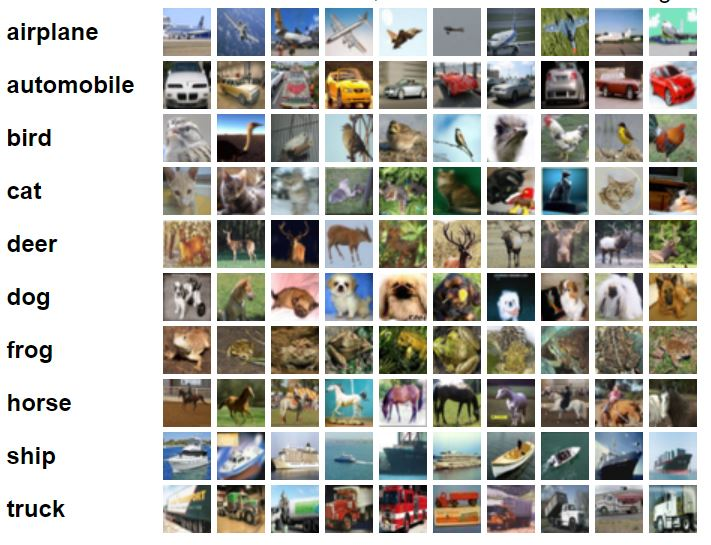

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Laod dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

### Dataset shape: (num_samples, height, width, channels)
#### For CIFAR-10 test set → (10000, 32, 32, 3):
#### 10000 images, each 32x32 pixels, 3 color channels (RGB).


In [4]:
y_train.shape

(50000, 1)

In [5]:
y_test.shape

(10000, 1)

There are 50000 traning images and 10000 test images

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train=y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [8]:
y_train[:7]

array([6, 9, 9, 4, 1, 1, 2], dtype=uint8)

In [9]:
y_test[:7]

array([3, 8, 8, 0, 6, 6, 1], dtype=uint8)

In [10]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
classes[y_train[790]]

'bird'

#### Image Plot function

In [13]:
def plot_sample(X,y,index):
 plt.figure(figsize = (15,2))
 plt.imshow(X[index])
 plt.xlabel(classes[int(y[index])])

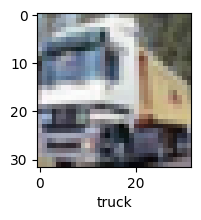

In [14]:
plot_sample(X_train,y_train,1)

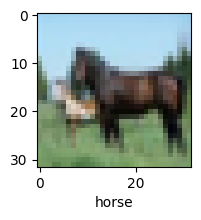

In [15]:
plot_sample(X_train,y_train,12)

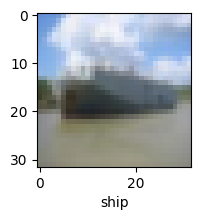

In [26]:
plot_sample(X_test,y_test,124)

In [17]:
)print(y_train.shape, y_test.shape)
print(y_train[0], y_test[0])


(50000,) (10000,)
6 3


### Data Preprocessing

Right now, pixel values are integers from 0–255.

Neural nets learn faster if inputs are normalized.

So scale them to 0–1 by dividing by 255.0:

### Normalizing the training data

In [18]:
X_train=X_train/255.0
X_test = X_test / 255.0

In [19]:
X_train[1:1:1]

array([], shape=(0, 32, 32, 3), dtype=float64)

### Check Class Distribution (optional but useful)

Plot histogram of labels to see if classes are balanced.

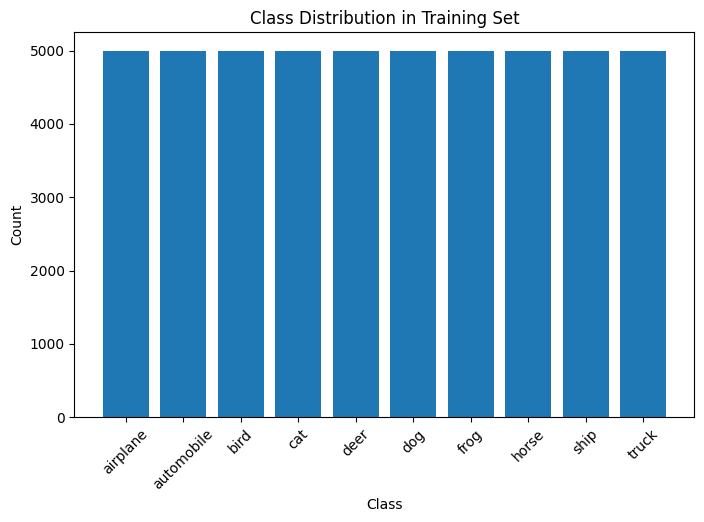

In [20]:
# Plot histogram of training labels
plt.figure(figsize=(8,5))
plt.hist(y_train, bins=np.arange(11)-0.5, rwidth=0.8)
plt.xticks(range(10), classes, rotation=45)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Training Set")
plt.show()

### CIFAR-10 is balanced (every class has 5000 training + 1000 test images)

### Build simple artificial neural network for image classification

In [49]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.3069 - loss: 1.9239
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 57ms/step - accuracy: 0.4215 - loss: 1.6401
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 58ms/step - accuracy: 0.4507 - loss: 1.5546
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 57ms/step - accuracy: 0.4798 - loss: 1.4844
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 61ms/step - accuracy: 0.4991 - loss: 1.4279


In [50]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred_ann = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred_ann]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.69      0.54      1000
           1       0.45      0.77      0.57      1000
           2       0.44      0.18      0.25      1000
           3       0.40      0.28      0.33      1000
           4       0.37      0.52      0.43      1000
           5       0.51      0.23      0.32      1000
           6       0.49      0.59      0.54      1000
           7       0.58      0.52      0.55      1000
           8       0.59      0.60      0.60      1000
           9       0.58      0.38      0.46      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.46     10000
weighted avg       0.49      0.48      0.46     10000



### ANN on CIFAR-10 stuck at ~50% accuracy → equivalent to random guessing.
### Reason: Dense layers alone cannot capture spatial features in images.
### Need CNN layers (Conv2D + Pooling) to learn local patterns (edges, textures, shapes).


### Build Your CNN Model

Start with a simple architecture:

Convolution + ReLU

MaxPooling

Flatten

Dense (Fully connected) + softmax

In [28]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile Model

Choose optimizer, loss, metrics:

In [29]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the Model

In [32]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8010 - loss: 0.5637
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8140 - loss: 0.5371
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8281 - loss: 0.4965
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8376 - loss: 0.4614
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8488 - loss: 0.4373
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8541 - loss: 0.4131
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.8666 - loss: 0.3845
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8714 - loss: 0.3664
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.8807 - loss: 0.3460
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.8883 - loss: 0.3205


In [33]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6775 - loss: 1.3012


[1.3135558366775513, 0.6747000217437744]

Prediction

In [34]:
y_pred_cnn= cnn.predict(X_test)
y_pred_cnn[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[2.89895870e-02, 4.90458769e-05, 1.14271261e-05, 7.62498617e-01,
        3.73045566e-07, 4.64369223e-04, 5.79913799e-03, 1.41501417e-07,
        2.02186584e-01, 7.08694870e-07],
       [4.17524370e-06, 1.85383856e-02, 2.58209926e-10, 2.11924631e-10,
        6.47743303e-10, 2.42953210e-11, 7.87624852e-15, 7.70086780e-16,
        9.81456697e-01, 7.58758006e-07],
       [1.64438479e-05, 2.74028070e-02, 1.66814436e-06, 1.97541940e-05,
        4.91087349e-09, 1.26512223e-05, 3.10696002e-08, 2.12762323e-08,
        9.72487688e-01, 5.88893090e-05],
       [8.97687674e-01, 1.36677445e-05, 8.05494725e-04, 3.43221768e-06,
        4.00393354e-08, 1.57830584e-08, 6.04219181e-08, 2.13691929e-11,
        1.01484664e-01, 4.86788485e-06],
       [1.09904859e-08, 1.59917821e-04, 7.72965932e-03, 6.07430190e-02,
        8.40387583e-01, 1.83725369e-03, 8.91016498e-02, 2.15626894e-09,
        2.97728930e-05, 1.10544888e-05]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred_cnn]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

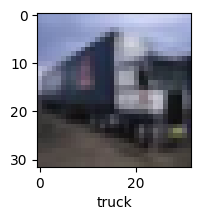

In [48]:
plot_sample(X_test, y_test,34)

In [47]:
classes[y_classes[34]]

'truck'

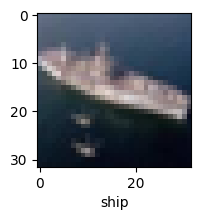

In [51]:
plot_sample(X_test, y_test,789)

In [52]:
classes[y_classes[789]]

'ship'

In [41]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_classes))

0.6747


In [42]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70      1000
           1       0.70      0.85      0.77      1000
           2       0.63      0.53      0.57      1000
           3       0.50      0.50      0.50      1000
           4       0.63      0.61      0.62      1000
           5       0.58      0.62      0.60      1000
           6       0.81      0.69      0.75      1000
           7       0.72      0.73      0.72      1000
           8       0.77      0.78      0.78      1000
           9       0.73      0.73      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [43]:
print(y_test[:10])

[3 8 8 0 6 6 1 6 3 1]


In [44]:
print(y_classes[:10])

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4), np.int64(6), np.int64(1), np.int64(2), np.int64(3), np.int64(1)]
